# 实验环境
Python 3.10.6
PyTorch 1.13.0
Matplotlib 3.7.1

由于 PTA 上传文件的限制，无法将数据集上传。

因此某些代码段无法运行，或者将数据集按要求放在文件夹中后，将注释符删去后运行。

文件结构：
```
./
├── dataset/
│   ├── LICENSE.txt
│   ├── training/
│   |   ├── daisy/...
│   |   ├── dandelion/...
│   |   ├── roses/...
│   |   ├── sunflower/...
│   |   └── tulips/...
│   └── test/
│       ├── daisy/...
│       ├── dandelion/...
│       ├── roses/...
│       ├── sunflower/...
│       └── tulips/...
├── test/
│   ├── rose.jpg
│   ├── sunflower.jpg
│   └── tuplis.jpg
├── ...
├── flower_prediction.ipynb
└── flower_prediction.py
```

# 导入必要的库

In [36]:
import os

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision import models

import matplotlib.pyplot as plt

# 设置信息

In [37]:
device = (
    torch.device(device="cuda")
    if torch.cuda.is_available()
    else torch.device(device="cpu")
)
print("Device: {}".format(device))

config = {
    "training_path": os.path.join("dataset", "training"),
    "test_path": os.path.join("dataset", "test"),
    "weights_path": "model_weights.pth",
    "optimizer_path": "optimizer_state.pth",
    "data_size": 3616,
    "HEIGHT": 224,
    "WIDTH": 224,
    "_R_MEAN": 123.68,
    "_G_MEAN": 116.78,
    "_B_MEAN": 103.94,
    "_R_STD": 1,
    "_G_STD": 1,
    "_B_STD": 1,
    "_RESIZE_SIDE_MIN": 256,
    "_RESIZE_SIDE_MAX": 512,
    "batch_size": 32,
    "num_class": 5,
    "epoch_size": 150,
    "loss_scale_num": 1024,
    "prefix": "resent-ai",
    "directory": "model_resnet",
    "save_checkpoint_steps": 10,
}

lr = 5e-4

Device: cuda


# 定义训练数据集和测试数据集并预处理
由于 PTA 上传文件的限制，无法将数据集上传。

请不要运行这段程序，或者将数据集按要求放在文件夹中后，将注释符删去后运行。

In [38]:
training_transform = transforms.Compose(
    transforms=[
        transforms.RandomResizedCrop(
            size=(config["HEIGHT"], config["WIDTH"]),
            scale=(0.5, 1.0),
            ratio=(1.0, 1.0),
        ),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)


test_transform = transforms.Compose(
    transforms=[
        transforms.Resize(size=(config["_RESIZE_SIDE_MIN"])),
        transforms.CenterCrop(size=(config["HEIGHT"], config["WIDTH"])),
        transforms.ToTensor(),
    ]
)


# training_data = datasets.ImageFolder(
#     root=config["training_path"],
#     transform=training_transform,
# )


# test_data = datasets.ImageFolder(
#     root=config["test_path"],
#     transform=test_transform,
# )


# training_loader = DataLoader(
#     dataset=training_data,
#     batch_size=config["batch_size"],
#     shuffle=True,
#     drop_last=True,
# )


# test_loader = DataLoader(
#     dataset=test_data,
#     batch_size=1,
# )

# 打印部分信息
由于 PTA 上传文件的限制，无法将数据集上传。

请不要运行这段程序，或者将数据集按要求放在文件夹中后，将注释符删去后运行。

Training set size: 2935
Test set size: 735
Channel size, height, width: torch.Size([3, 224, 224])
Label of the first photo: 0


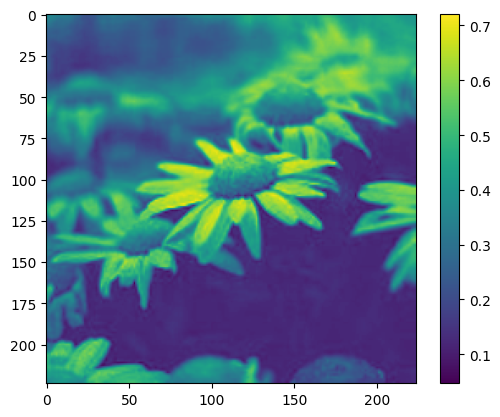

In [39]:
# print("Training set size: {}".format(len(training_data)))
# print("Test set size: {}".format(len(test_data)))

# classes = test_data.classes
# training_features, training_labels = next(iter(training_loader))
# print("Channel size, height, width: {}".format(training_features[0].shape))
# print("Label of the first photo: {}".format(training_labels[0]))

# plt.figure()
# plt.imshow(training_features[0, 0, ...])
# plt.colorbar()
# plt.grid(visible=False)
# plt.show()

# 定义神经网络模型、损失函数和优化器

In [40]:
model = models.resnet50()
model.fc = nn.Linear(in_features=2048, out_features=5)
model.to(device=device)
model.load_state_dict(torch.load(f=config["weights_path"]))
model.eval()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    params=model.parameters(),
    lr=lr,
    momentum=0.9,
    weight_decay=1e-4,
)
optimizer.load_state_dict(state_dict=torch.load(f=config["optimizer_path"]))

# 训练神经网络模型并测试结果
由于已经预训练过模型的参数，这里仅打印对测试图像的分类结果。

In [41]:
def train_loop(dataloader, model, loss_fn, optimizer):
    for X, y in dataloader:
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)

            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print("Accuracy: {}, Avg loss: {}\n".format(correct, test_loss))


# epoch = 10
# for _ in range(epoch):
#     train_loop(dataloader=training_loader, model=model, loss_fn=loss_fn, optimizer=optimizer)
# torch.save(obj=model.state_dict(), f=config["weights_path"])
# torch.save(obj=optimizer.state_dict(), f=config["optimizer_path"])

# test_loop(dataloader=test_loader, model=model, loss_fn=loss_fn)

Accuracy: 0.7605442176870748, Avg loss: 0.6420517454068542



# 绘制误差图像
在前 100 轮训练过程中记录了训练误差和测试误差。

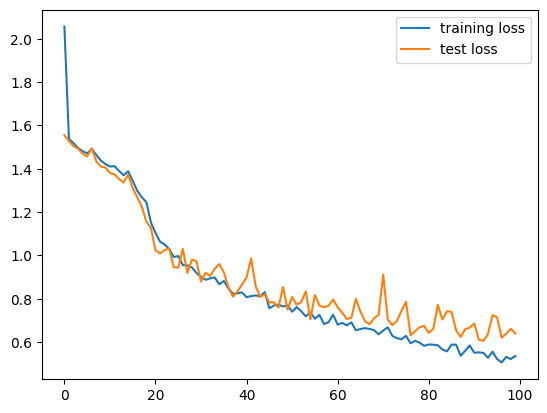

In [42]:
with open(file="training_loss.txt", mode="r") as f:
    training_loss = [float(loss) for loss in f.readlines()]

with open(file="test_loss.txt", mode="r") as f:
    test_loss = [float(loss) for loss in f.readlines()]

plt.plot(training_loss, label="training loss")
plt.plot(test_loss, label="test loss")
plt.legend()
plt.show()

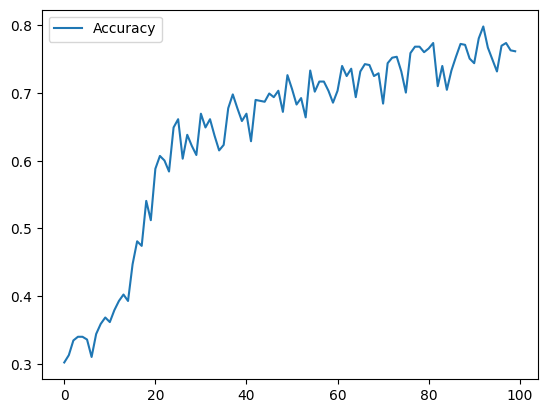

In [43]:
with open(file="accuracy.txt", mode="r") as f:
    accuracy = [float(acc) for acc in f.readlines()]

plt.plot(accuracy, label="Accuracy")
plt.legend()
plt.show()

# 测试三张图片的分类

In [44]:
class_map = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

rose = Image.open(
    fp=os.path.join("test", "rose.jpg")
)
sunflower = Image.open(
    fp=os.path.join("test", "sunflower.jpg")
)
tulips = Image.open(
    fp=os.path.join("test", "tulips.jpg")
)

rose = test_transform(rose)
sunflower = test_transform(sunflower)
tulips = test_transform(tulips)

rose = torch.unsqueeze(input=rose, dim=0)
sunflower = torch.unsqueeze(input=sunflower, dim=0)
tulips = torch.unsqueeze(input=tulips, dim=0)

rose = rose.to(device=device)
sunflower = sunflower.to(device=device)
tulips = tulips.to(device=device)

pred = model(rose)
print("Prediction of rose.jpg:")
print(
    "Scores:\n{},\nprediction: {},\npredicted label: {}\n".format(
        pred.data, torch.argmax(pred.data), class_map[torch.argmax(pred.data)]
    )
)

pred = model(sunflower)
print("Prediction of sunflower.jpg:")
print(
    "Scores:\n{},\nprediction: {},\npredicted label: {}\n".format(
        pred.data, torch.argmax(pred.data), class_map[torch.argmax(pred.data)]
    )
)

pred = model(tulips)
print("Prediction of tulips.jpg:")
print(
    "Scores:\n{},\nprediction: {},\npredicted label: {}\n".format(
        pred.data, torch.argmax(pred.data), class_map[torch.argmax(pred.data)]
    )
)

Prediction of rose.jpg:
Scores:
tensor([[-2.3598, -4.6731,  6.7207, -4.8642,  4.8836]], device='cuda:0'),
prediction: 2,
predicted label: roses

Prediction of sunflower.jpg:
Scores:
tensor([[-4.1373, -3.3282, -3.1920, 12.5895, -2.1965]], device='cuda:0'),
prediction: 3,
predicted label: sunflowers

Prediction of tulips.jpg:
Scores:
tensor([[-2.4236, -6.9851,  4.3386, -3.8036,  8.8189]], device='cuda:0'),
prediction: 4,
predicted label: tulips

